In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import plotly.plotly as py
from plotly import tools
from wordcloud import WordCloud
from datetime import date
import random 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
# Helper functions for visualization
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = app_train[app_train["default"] == 1]
    df0 = app_train[app_train["default"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='default : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='default : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

In [3]:
# Import the data
os.getcwd()
app_train = pd.read_csv("./train_data.csv")
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc
0,63480419,Current,NaN,15954,debt_consolidation,KS,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,5-Aug,15-Nov,Not Verified,5 years,24.85,Branch Office Administrator,62000.00
1,51386490,Current,NaN,73814,debt_consolidation,MD,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Sep-83,15-Jun,Verified,10+ years,26.38,IIntelligence Analyst,113000.00
2,13567696,Current,NaN,30013,major_purchase,TX,Major purchase,OWN,INDIVIDUAL,NaN,Dec-99,14-Apr,Not Verified,10+ years,14.41,Global Service Delivery Lead,180000.00
3,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00
4,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00
5,35683119,Current,NaN,10327,debt_consolidation,MI,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,3-Jun,14-Nov,Source Verified,4 years,19.98,machine operator,60000.00
6,28674611,Current,NaN,41756,debt_consolidation,CA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-86,14-Oct,Verified,10+ years,20.11,Assistant Manager,82000.00
7,7047928,Fully Paid,NaN,40836,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00
8,51186597,Current,76.0,5259,debt_consolidation,NC,Debt consolidation,RENT,INDIVIDUAL,NaN,6-Feb,15-Jun,Not Verified,10+ years,5.01,Owner,60000.00
9,1060578,Fully Paid,NaN,25237,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00


# Exploratory Data Analysis

Check how many features are there, and how many data rows are there.

In [4]:
app_train.shape

(200000, 17)

There are 17 features, and 200,000 rows.

Next, let's check data types.

In [5]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
id                             200000 non-null int64
loan_status                    200000 non-null object
mths_since_last_major_derog    49745 non-null float64
revol_bal                      200000 non-null int64
purpose                        200000 non-null object
addr_state                     200000 non-null object
title                          199964 non-null object
home_ownership                 200000 non-null object
application_type               200000 non-null object
verification_status_joint      111 non-null object
earliest_cr_line               199989 non-null object
apply_date                     200000 non-null object
verification_status            200000 non-null object
emp_length                     189735 non-null object
dti                            200000 non-null float64
emp_title                      188207 non-null object
annual_inc                   

We can see that there are 5 numerical attributes, and 12 categorical attributes.

Next, let's check missing values.

In [6]:
app_train.isnull().sum()

id                                  0
loan_status                         0
mths_since_last_major_derog    150255
revol_bal                           0
purpose                             0
addr_state                          0
title                              36
home_ownership                      0
application_type                    0
verification_status_joint      199889
earliest_cr_line                   11
apply_date                          0
verification_status                 0
emp_length                      10265
dti                                 0
emp_title                       11793
annual_inc                          2
dtype: int64

Notice that vast majority of data are missing for "mths_since_last_major_derog" and "verification_status_joint". These columns therefore should be dropped. 
'annual_inc' has only 2 missing values, so we can either impute with the mean, or we can just exclude these 2 rows. 
The rest of missing columns are: "emp_title", "emp_length", "title", "earliest_cr_line".

When looking at the data, I am curious if 'application_type' would be an important factor?

In [7]:
# Check application_type
app_train.application_type.value_counts()

INDIVIDUAL    199889
JOINT            111
Name: application_type, dtype: int64

It turns out that vast majority of applications are individual! 99%. Most likely to drop this column.

Looking at column 'purpose' and 'titlte' could provide us with some information as well.

In [8]:
app_train[['purpose', 'title']]

,purpose,title
0,debt_consolidation,Debt consolidation
1,debt_consolidation,Debt consolidation
2,major_purchase,Major purchase
3,credit_card,Credit card refinancing
4,home_improvement,Home Improvement
5,debt_consolidation,Debt consolidation
6,debt_consolidation,Debt consolidation
7,debt_consolidation,Debt Consolidation
8,debt_consolidation,Debt consolidation
9,debt_consolidation,debt


It's noticable that columns 'purpose' and 'title' contain essential the same information, with 'purpose' column formally recorded. As a result, we can drop the column 'title'.  

Next, let's explore the column we're for sure cannot miss, "loan_status" column.

In [9]:
app_train.loan_status.value_counts()

Current                                                135528
Fully Paid                                              46837
Charged Off                                             10270
Late (31-120 days)                                       2626
Issued                                                   1919
In Grace Period                                          1411
Late (16-30 days)                                         509
Does not meet the credit policy. Status:Fully Paid        452
Default                                                   288
Does not meet the credit policy. Status:Charged Off       160
Name: loan_status, dtype: int64

We can see that there are several categories for 'loan_status'. The one we care about are the 'default=NO', in this case would be "Fully Paid", and the 'default=YES', in this case would be 'Charged Off', 'Late (31-120 days)', and 'Default'.

Due to the nature of the problem, we'd have to perform a filtering step here, to get the 'default' YES and NO classes.

In [10]:
# Helper function to filter the 'default' YES and NO classes.
def f(row):
    if row['loan_status'] in ['Fully Paid']:
        val = 0
    elif row['loan_status'] in ['Charged Off', 'Late (31-120 days)', 'Default']:
        val = 1
    else: val = -1    
    return val

With the help of the above helper function, we can attain the data that we want to examine.

In [11]:
app_train['default'] = app_train.apply(f, axis=1)
app_train.default.value_counts()

-1    139979
 0     46837
 1     13184
Name: default, dtype: int64

In [12]:
# Getting the new data
app_train = app_train[(app_train.default == 0) | (app_train.default == 1)]
app_train.reset_index(inplace=True)
app_train.drop(columns=['index'], inplace=True)
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00,0
1,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00,0
2,7047928,Fully Paid,NaN,40836,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00,0
3,1060578,Fully Paid,NaN,25237,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00,0
4,28604357,Fully Paid,NaN,17469,debt_consolidation,SD,Debt consolidation,RENT,INDIVIDUAL,NaN,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.00,0
5,1434490,Fully Paid,NaN,7992,debt_consolidation,AR,Debt Pay Off,MORTGAGE,INDIVIDUAL,NaN,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.00,0
6,1605698,Fully Paid,NaN,20720,debt_consolidation,GA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.00,0
7,12205058,Fully Paid,NaN,7953,debt_consolidation,MO,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.00,0
8,1396541,Charged Off,NaN,17212,credit_card,NY,Consolidate,RENT,INDIVIDUAL,NaN,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.00,1
9,650922,Fully Paid,NaN,7839,debt_consolidation,NC,Financial Freedom (Debt Consolidation),RENT,INDIVIDUAL,NaN,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.00,0


In [13]:
app_train.shape

(60021, 18)

Our data now has 18 features, with extra 'default' column, and 60021 rows.

Now we can visualize the relation between class 'default' YES and 'NO' with respect to other features.
First, let's look at 'default' distribution.

In [14]:
# Target Variable Distribution 
init_notebook_mode(connected=True)
bar_hor(app_train, "default", "Distribution of default variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['default : 1','default : 0'])

We can see that the data is quite imbalanced. We would have to perform some oversampling or undersampling methods later.

Let's find out what the main purposes for getting loans are.

In [15]:
app_train.purpose.value_counts()

debt_consolidation    35537
credit_card           11685
home_improvement       3537
other                  3381
major_purchase         1405
small_business         1081
car                     868
medical                 679
moving                  506
house                   420
wedding                 414
vacation                371
educational              77
renewable_energy         60
Name: purpose, dtype: int64

In [16]:
# Visualization
tr0 = bar_hor(app_train, "purpose", "Distribution of purpose Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('purpose', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["purpose Distribution" , "purpose, default=1" ,"purpose, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

The main purpose of getting loans are for "debt_consolidation", followed by "credit_card", and "home_improvement". Interestingly, "credit_card" and "home_improvement" puspose tend to "default" less, while "small_business" has the highest default rate. Therefore, it's likely that 'purpose' is among good feature for classification. 

Next, let's see state distribution.

In [17]:
app_train.addr_state.value_counts()

CA    10011
NY     5066
TX     4613
FL     4240
NJ     2305
IL     2144
PA     1973
GA     1942
VA     1864
OH     1820
NC     1665
AZ     1494
MA     1439
MD     1438
MI     1406
WA     1397
CO     1353
MN     1035
MO      904
CT      887
NV      877
OR      809
AL      766
LA      740
WI      738
SC      713
IN      640
TN      586
OK      549
KY      530
KS      489
UT      482
AR      434
HI      364
NM      311
WV      280
NH      270
RI      254
DC      205
DE      186
MT      167
AK      151
WY      139
SD      134
VT      104
MS       94
NE        8
IA        3
ME        2
Name: addr_state, dtype: int64

In [18]:
tr0 = bar_hor(app_train, "addr_state", "Distribution of addr_state Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('addr_state', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["addr_state Distribution" , "addr_state, default=1" ,"addr_state, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Notice that most borrowers are from CA and NY, followed by TX and FL. This is understandable due to their corresponding population. Interestingly, some states that have very few applications are among the ones that have highest default rates, but most likely these occur just by chance. My first thought would be that 'state' might not play an important role in 'default' status. Most likely I will drop 'state' for the first analyze.

Next, let's examine 'home_onwership'.

In [19]:
# Check home ownership
app_train.home_ownership.value_counts()

MORTGAGE    29526
RENT        25173
OWN          5279
OTHER          34
NONE            8
ANY             1
Name: home_ownership, dtype: int64

In [20]:
tr0 = bar_hor(app_train, "home_ownership", "Distribution of home_ownership Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('home_ownership', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Home Ownership Distribution" , "home_ownership, default=1" ,"home_ownership, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Most borrowers are having mortgage, followed by 'rent'.

Next, let's check 'verification_status'. 

In [21]:
# verification_status 	emp_length 	dti 	emp_title 	annual_inc
# Check verification status
app_train.verification_status.value_counts()

Verified           22292
Not Verified       19936
Source Verified    17793
Name: verification_status, dtype: int64

In [22]:
tr0 = bar_hor(app_train, "verification_status", "Distribution of verification_status Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('verification_status', 'Distribution of Default with verification_status')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["verification_status Distribution" , "verification_status, default=1" ,"verification_status, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Interestingly, the ones that are 'Verified' or 'Source Verified' have higher percentage of 'default = 1' compared to 'Not Verified'. In general, it seems that 'verification_status' does not play an essential role to 'default'. Most likely to drop this column in the first experimentation.

Next, let's examine 'emp_length'.

In [23]:
# Check employment length
app_train.emp_length.value_counts()

10+ years    18298
2 years       5618
3 years       4895
< 1 year      4890
5 years       4243
1 year        3944
4 years       3788
6 years       3558
7 years       3311
8 years       2777
9 years       2253
Name: emp_length, dtype: int64

In [24]:
tr0 = bar_hor(app_train, "emp_length", "Distribution of emp_length Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('emp_length', 'Distribution of Default with emp_length')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["emp_length Distribution" , "emp_length, default=1" ,"emp_length, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In general, 'emp_length' does not seem to influence 'default'. Most likely to drop.

Next, let's look at 'emp_title'.

In [25]:
app_train.emp_title.value_counts()

Manager                                     489
Teacher                                     431
Registered Nurse                            202
Supervisor                                  201
RN                                          176
Sales                                       173
Project Manager                             159
manager                                     157
Driver                                      155
Office Manager                              138
Director                                    132
Engineer                                    118
Owner                                       113
driver                                      111
teacher                                     107
Vice President                              102
US Army                                     100
General Manager                             100
Operations Manager                           98
Administrative Assistant                     91
Executive Assistant                     

'emp_title' does not seem to provide a lot of information about 'default' status, given its number of categories. Most likely to drop in the first experimenation.

Next, let's look at 'revol_bal'.

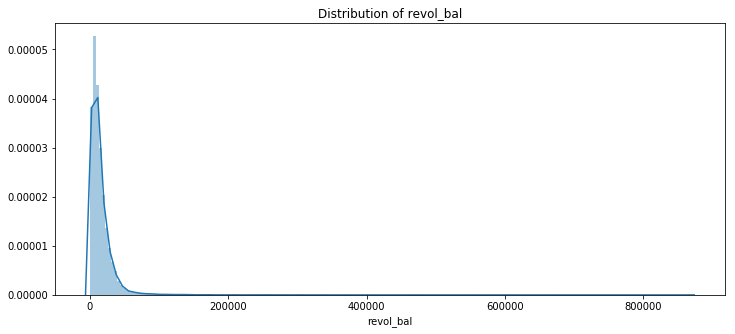

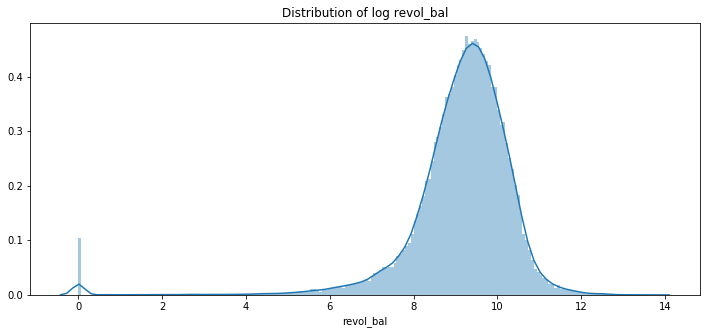

In [26]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of revol_bal")
ax = sns.distplot(app_train["revol_bal"], bins=200)

log_data = np.log(app_train["revol_bal"]+1)
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of log revol_bal")
ax = sns.distplot(log_data, bins=200)
app_train['revol_bal'] = log_data
#plt.hist(heights['Height'], bins = 6)

In [27]:
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,Fully Paid,NaN,9.284427,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00,0
1,6539569,Fully Paid,NaN,10.478752,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00,0
2,7047928,Fully Paid,NaN,10.617344,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00,0
3,1060578,Fully Paid,NaN,10.136106,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00,0
4,28604357,Fully Paid,NaN,9.768240,debt_consolidation,SD,Debt consolidation,RENT,INDIVIDUAL,NaN,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.00,0
5,1434490,Fully Paid,NaN,8.986321,debt_consolidation,AR,Debt Pay Off,MORTGAGE,INDIVIDUAL,NaN,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.00,0
6,1605698,Fully Paid,NaN,9.938903,debt_consolidation,GA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.00,0
7,12205058,Fully Paid,NaN,8.981430,debt_consolidation,MO,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.00,0
8,1396541,Charged Off,NaN,9.753420,credit_card,NY,Consolidate,RENT,INDIVIDUAL,NaN,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.00,1
9,650922,Fully Paid,NaN,8.966994,debt_consolidation,NC,Financial Freedom (Debt Consolidation),RENT,INDIVIDUAL,NaN,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.00,0


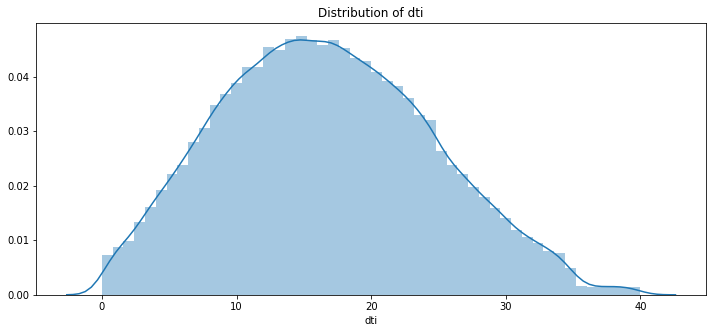

In [28]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of dti")
ax = sns.distplot(app_train["dti"])

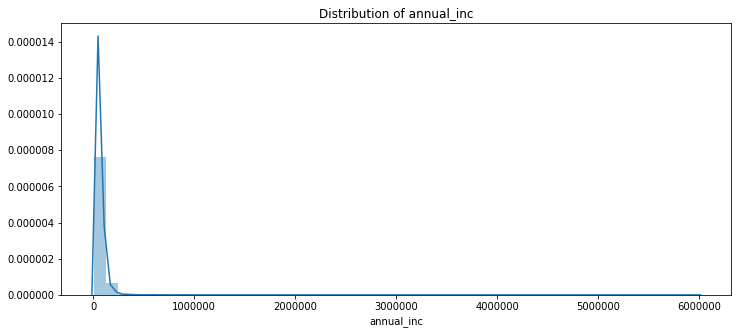

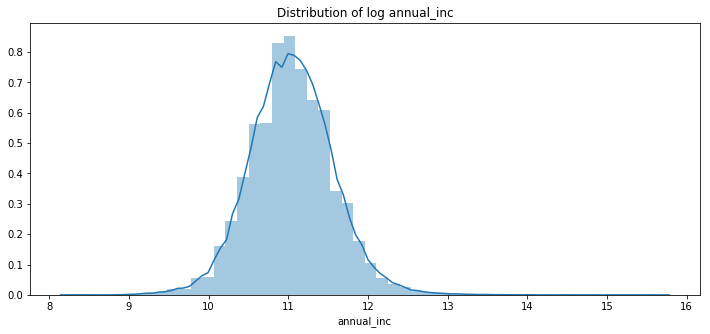

In [29]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of annual_inc")
ax = sns.distplot(app_train["annual_inc"])

log_data = np.log(app_train["annual_inc"])
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of log annual_inc")
ax = sns.distplot(log_data, bins=50)
app_train['annual_inc'] = log_data
#plt.hist(heights['Height'], bins = 6)

In [30]:
#sns.pairplot(app_train)
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,Fully Paid,NaN,9.284427,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,11.097410,0
1,6539569,Fully Paid,NaN,10.478752,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,11.608236,0
2,7047928,Fully Paid,NaN,10.617344,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,11.492774,0
3,1060578,Fully Paid,NaN,10.136106,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,10.915088,0
4,28604357,Fully Paid,NaN,9.768240,debt_consolidation,SD,Debt consolidation,RENT,INDIVIDUAL,NaN,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,11.177453,0
5,1434490,Fully Paid,NaN,8.986321,debt_consolidation,AR,Debt Pay Off,MORTGAGE,INDIVIDUAL,NaN,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,11.440355,0
6,1605698,Fully Paid,NaN,9.938903,debt_consolidation,GA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,10.596635,0
7,12205058,Fully Paid,NaN,8.981430,debt_consolidation,MO,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,10.043249,0
8,1396541,Charged Off,NaN,9.753420,credit_card,NY,Consolidate,RENT,INDIVIDUAL,NaN,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,10.778956,1
9,650922,Fully Paid,NaN,8.966994,debt_consolidation,NC,Financial Freedom (Debt Consolidation),RENT,INDIVIDUAL,NaN,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",10.901358,0


# Data Cleaning and Impute Missing Data

In [31]:
app_train.drop(['loan_status'], axis=1, inplace=True)
app_train.drop(['mths_since_last_major_derog', 'verification_status_joint'], axis=1, inplace=True)
app_train.drop(['title'], axis=1, inplace=True)
app_train.drop(['application_type'], axis=1, inplace=True)

In [32]:
def impute_em_length(x):
    if x == "< 1 year": return 0
    elif x == "10+ years": return 10
    elif pd.isnull(x): return x
    else: return int(str(x).split(" ")[0])

In [33]:
app_train.emp_length = app_train.emp_length.apply(impute_em_length)

In [34]:
app_train.isnull().sum()

id                        0
revol_bal                 0
purpose                   0
addr_state                0
home_ownership            0
earliest_cr_line          0
apply_date                0
verification_status       0
emp_length             2446
dti                       0
emp_title              3366
annual_inc                0
default                   0
dtype: int64

In [35]:
# Impute "emp_length"
print("Median:", app_train.emp_length.median())
app_train.emp_length.value_counts(sort=True)
app_train.emp_length.fillna(6, inplace=True)

Median: 6.0


Notice: Choose to drop emp_title for now

In [36]:
#app_train.drop(['emp_title'], axis=1)
app_train = app_train.drop(['id', 'earliest_cr_line', 'apply_date', 'emp_title', 'addr_state', 'emp_length'], axis=1)

In [37]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60021 entries, 0 to 60020
Data columns (total 7 columns):
revol_bal              60021 non-null float64
purpose                60021 non-null object
home_ownership         60021 non-null object
verification_status    60021 non-null object
dti                    60021 non-null float64
annual_inc             60021 non-null float64
default                60021 non-null int64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.2+ MB


In [38]:
from sklearn import preprocessing

In [39]:
for x in app_train.columns:
    if app_train[x].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(list(app_train[x].values))
        app_train[x] = label.transform(list(app_train[x].values))

In [40]:
app_train

,revol_bal,purpose,home_ownership,verification_status,dti,annual_inc,default
0,9.284427,1,1,0,24.31,11.097410,0
1,10.478752,4,1,2,1.70,11.608236,0
2,10.617344,2,1,0,19.86,11.492774,0
3,10.136106,2,5,0,20.01,10.915088,0
4,9.768240,2,5,1,16.76,11.177453,0
5,8.986321,2,1,1,18.22,11.440355,0
6,9.938903,2,1,2,20.73,10.596635,0
7,8.981430,2,1,1,29.38,10.043249,0
8,9.753420,1,5,2,25.20,10.778956,1
9,8.966994,2,5,2,14.29,10.901358,0


In [41]:
#app_train['revol_bal'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [42]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(app_train[['revol_bal']])
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized

In [ ]:
#app_train.revol_bal = df_normalized[0]
#app_train

In [ ]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(app_train[['dti']])
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized

In [ ]:
#app_train.dti = df_normalized[0]
#app_train

In [ ]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(app_train[['annual_inc']])
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized

In [ ]:
#app_train.annual_inc = df_normalized[0]
#app_train

In [41]:
app_train = pd.get_dummies(data=app_train, columns=['purpose', 'home_ownership', 'verification_status'], drop_first=True)

In [42]:
app_train

,revol_bal,dti,annual_inc,default,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,home_ownership_1,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,verification_status_1,verification_status_2
0,9.284427,24.31,11.097410,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,10.478752,1.70,11.608236,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,10.617344,19.86,11.492774,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,10.136106,20.01,10.915088,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.768240,16.76,11.177453,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,8.986321,18.22,11.440355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,9.938903,20.73,10.596635,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,8.981430,29.38,10.043249,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,9.753420,25.20,10.778956,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,8.966994,14.29,10.901358,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


# Build Models

### Build a Random Forest model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [44]:
y = app_train.default
X = app_train.drop(columns=['default'])

In [45]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def makeOverSamplesSMOTE(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import SMOTE
 sm = SMOTE()
 X, y = sm.fit_sample(X, y)
 return X,y

In [46]:
# Implement RandomUnderSampler
#random_undersampler = RandomUnderSampler()
#X_res, y_res = random_undersampler.fit_sample(X, y)
X_res, y_res = makeOverSamplesSMOTE(X, y)

In [47]:
y_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [50]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,8.843935,4.230918,10.928371,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,1.000000
1,8.417815,13.620000,11.599103,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,9.896966,12.030000,11.813030,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
3,10.322362,24.290000,11.286364,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
4,9.124020,13.510000,10.463103,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,9.053687,20.270000,10.714418,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,10.712527,24.880000,11.308407,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,8.523970,15.490000,10.714418,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000
8,8.876980,23.647721,11.012388,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000
9,10.177543,10.938498,11.193920,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101, stratify=y_res)

In [51]:
# standardize data
#min_max_scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
robust_scaler.fit_transform(X_train[0:2])
X_train[0:2] = robust_scaler.fit_transform(X_train[0:2]) 
X_test[0:2] = robust_scaler.fit_transform(X_test[0:2])

#scaler = preprocessing.RobustScaler()
#robust_scaled_df = scaler.fit_transform(x)
#robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

In [54]:
clf1 = RandomForestClassifier(n_estimators=500, max_depth=30)
clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
pred1 = clf1.predict(X_test)

In [56]:
acc1 = accuracy_score(np.array(y_test), pred1)
acc1

0.7600256200405651

In [57]:
cm1 = confusion_matrix(y_test, pred1)
print(cm1)

[[10421  3630]
 [ 3114 10938]]


In [58]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     14051
           1       0.75      0.78      0.76     14052

   micro avg       0.76      0.76      0.76     28103
   macro avg       0.76      0.76      0.76     28103
weighted avg       0.76      0.76      0.76     28103



### Build a Logistic Regression Model

In [59]:
from sklearn.linear_model import LogisticRegression 

In [60]:
clf2 = LogisticRegression()

In [61]:
clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
pred2 = clf2.predict(X_test)

In [63]:
acc2 = accuracy_score(y_test, pred2)
acc2

0.5897946838415827

In [64]:
cm2 = confusion_matrix(y_test, pred2)
print(cm2)

[[8161 5890]
 [5638 8414]]


In [65]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59     14051
           1       0.59      0.60      0.59     14052

   micro avg       0.59      0.59      0.59     28103
   macro avg       0.59      0.59      0.59     28103
weighted avg       0.59      0.59      0.59     28103



### Build XGBoost Model with Grid Search

In [66]:
import xgboost
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import GridSearchCV
#data_dmatrix = xgboost.DMatrix(data=X, label=y)

In [81]:
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

In [68]:
# Parameter Tuning
model = xgb()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [300,400,500,600],
              "learning_rate": [0.1,0.15,0.2],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, 
                                   verbose=10, n_jobs=10)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_



Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   51.4s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  6.7min
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:  9.4min
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed: 16.7min
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed: 21.6min
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed: 27.3min
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed: 34.3min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 47.2min
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed: 59.7min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 68.3min
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed: 7

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
#clf3 = xgb(n_estimators=500, max_depth=20)
clf3 = xgb(max_depth=30, min_child_weight=1,  n_estimators=300,\
                          n_jobs=-1 , verbose=1,learning_rate=0.1)

In [72]:
clf3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=1)

In [73]:
pred3 = clf3.predict(X_test)

In [74]:
acc3 = accuracy_score(np.array(y_test), pred3)
acc3

0.7924776714229798

In [75]:
cm3 = confusion_matrix(y_test, pred3)
print(cm3)

[[11304  2747]
 [ 3085 10967]]


In [76]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     14051
           1       0.80      0.78      0.79     14052

   micro avg       0.79      0.79      0.79     28103
   macro avg       0.79      0.79      0.79     28103
weighted avg       0.79      0.79      0.79     28103



In [82]:
auc(clf3, X_train, X_test)

(0.9999997711391616, 0.8658566882834587)

### 

In [60]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
svm_lin = svm.SVC(kernel='poly', degree=9)

In [53]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_new = scaling.transform(X_train)
X_test_new = scaling.transform(X_test)

In [61]:
svm_lin.fit(X_train_new, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
pred_svm_lin = svm_lin.predict(X_test_new)

In [63]:
acc4 = accuracy_score(np.array(y_test), pred_svm_lin)
acc4

0.5936376899263424

In [ ]:
pd.DataFrame(X_train)

In [57]:
svm_rbf = svm.SVC(kernel='rbf', C=100, gamma=0.00001)


In [58]:
svm_rbf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
pred_svm_rbf = svm_rbf.predict(X_test)
acc5 = accuracy_score(np.array(y_test), pred_svm_rbf)
acc5

0.5880866811372452